In [11]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt

In [29]:
mandrill = plt.imread('mandrill.png')[:,:,:3].astype(float)
N = int(mandrill.shape[0])

M = 2
k = 64

X = np.zeros((N**2//M**2, 3*M**2))
for i in range(N//M):
    for j in range(N//M):
        X[i*N//M+j,:] = mandrill[i*M:(i+1)*M,j*M:(j+1)*M,:].reshape(3*M**2)


np.random.seed(0)
kmeans = X[np.random.choice(X.shape[0],k,replace=False),:]
numIter = 50
objective = np.zeros(numIter)
for l in range(numIter):
    distances = np.sum((X[:, np.newaxis, :] - kmeans)**2, axis=2)
    labels = np.argmin(distances,axis=1)
    for j in range(k):
        kmeans[j,:] = np.mean(X[labels == j, :], axis=0)
    
    objective[l] = np.sum(distances[np.arange(X.shape[0]), labels])

adjusted_X = np.zeros_like(X)
for a in range(k):
    adjusted_X[labels == a, :] = kmeans[a,:]
adjusted_mandrill = np.zeros_like(mandrill)
for b in range(N//M):
    for c in range(N//M):
        adjusted_mandrill[b*M:(b+1)*M,c*M:(c+1)*M,:] = adjusted_X[b*N//M+c,:].reshape(M,M,3)
    

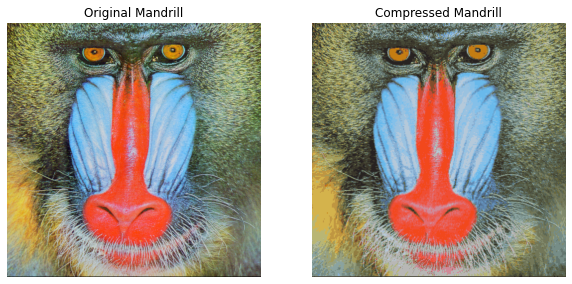

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(mandrill)
plt.title('Original Mandrill')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(adjusted_mandrill)
plt.title('Compressed Mandrill')
plt.axis('off')
plt.show()

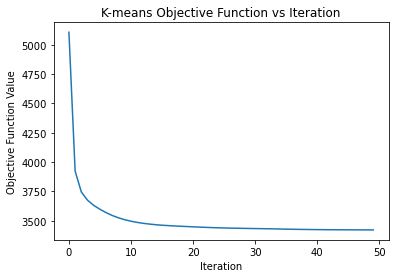

In [31]:
plt.figure()
plt.plot(np.arange(numIter), objective)
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('K-means Objective Function vs Iteration')
plt.show()

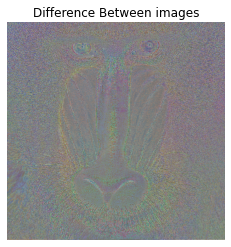

In [32]:
plt.figure()
plt.imshow(adjusted_mandrill - mandrill + 0.5)
plt.title('Difference Between images')
plt.axis('off')
plt.show()

In [33]:
error = np.sum(np.abs(adjusted_mandrill - mandrill)) / (255 * 3 * N**2)
print('Relative Mean Absolute Error:', error)

Relative Mean Absolute Error: 0.0001968227945948372
